# I. Lý thuyết

Đây là bảng confusion matrix của một mô hình phân loại nhị phân

![](https://imgur.com/1UZL68u.png)

Hãy cho biết:

1.- Đâu là công thức đúng của _Sensitivity (độ nhạy)_ ?

A. TP/(TP + FP)

(B). TP/(TP + FN)

C. TP/(TN + FN)

D. TP/(TN + FP)

2.- Ý nghĩa của _Sensitivity (độ nhạy)_ trong mô hình chuẩn đoán bệnh?

(A). Sensitivity cho biết nếu một người mắc bệnh thật thì mô hình có thể nhận biết được mắc bệnh với xác suất là bao nhiêu phần trăm ?

B. Sensitivity cho biết nếu mô hình chuẩn đoán một người mắc bệnh thì người đó có khả năng bị mắc bệnh thật là bao nhiêu phần trăm ?

C. Sensitivity cho biết nếu một người không bị mắc bệnh thì mô hình có thể nhận biết được người đó không mắc bệnh với xác suất bao nhiêu phần trăm ?

D. Sensitivity cho biết trong số những trường hợp không bị mắc bệnh thì mô hình có thể nhận biết được là bao nhiêu phần trăm ?

Có ba mô hình với cùng accuracy như sau. 

![](https://imgur.com/zXUy6zd.png)

![](https://imgur.com/0GBEf8v.png)

![](https://imgur.com/t5I6f4y.png)

3.- Mô hình nào sẽ được lựa chọn?

A. Mô hình 1

B. Mô hình 2

(C). Mô hình 3

D. Cả ba mô hình đều như nhau.

4.- f1-score của cả ba mô hình là lần lượt là:

A. m1: 0.571; m2: 0.675; m3: 0.75

B. m1: 0.75; m2: 0.675; m3: 0.889

(C). m1: 0.571; m2: 0.75; m3: 0.889

D. không có đáp án nào đúng.

5.- Một mô hình phân loại ngẫu nhiên sẽ có đường ROC như thế nào ?

(A). Lồi lên phía trên.

B. Tiệm cận đường chéo nét đứt.

C. Lõm xuống phía dưới.

D. Có dạng hình sin.

# II. Thực hành

Một mô hình phân loại nhị phân có giá trị dự báo `y_hat` và giá trị ground truth `y` lần lượt như sau:

In [ ]:
import numpy as np

y     = np.array([1, 0, 1, 1, 0,
                  1, 0, 0, 1, 0])
y_hat = np.array([0.8, 0.1, 0.85, 0.2, 0.4, 
                  0.7, 0.25, 0.05, 0.6, 0.1])

6. Nếu ngưỡng phân loại `threshold = 0.5`. Viết hàm tính 3 giá trị: `precision, recall, f1-score`


In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, (y_hat>0.5))
print(confusion_matrix)

[[5 0]
 [1 4]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y, (y_hat>0.5), average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y, (y_hat>0.5), average='binary')
print('Recall: %.3f' % recall)
f1score = f1_score(y, (y_hat>0.5), average='binary')
print('f1-score: %.3f' % f1score)

Precision: 1.000
Recall: 0.800
f1-score: 0.889


7. Nếu ngưỡng phân loại là `threshold = 0.5`. Viết hàm tính giá trị: `sensitivity, specificity`.

In [ ]:
from sklearn.metrics import confusion_matrix
tp,fp,fn,tn=  metrics.confusion_matrix(y, (y_hat>0.5)).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print('sensitivity: %.3f' % sensitivity)
print('specificity: %.3f' % specificity)

sensitivity: 0.833
specificity: 1.000


8. Vẽ biểu đồ đường cong ROC. Khi threshold thay đổi từ `[0, 1]` với steps là 0.05

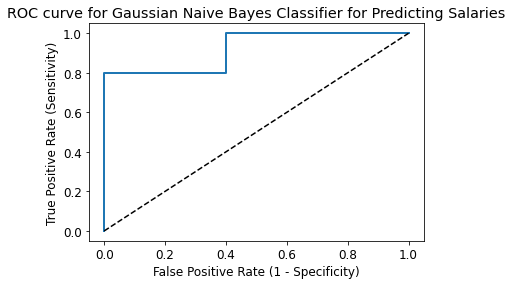

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

sensitivity, specificity, thresholds = roc_curve(y,y_hat)
plt.figure(figsize=(6,4))
plt.plot(sensitivity, specificity, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

9. Vẽ biểu đồ biểu diễn giá trị của `precision, recall` trên đồ thị khi threshold thay đổi từ `[0, 1]` với steps là 0.05.

In [ ]:
precision, recall

(1.0, 0.8)

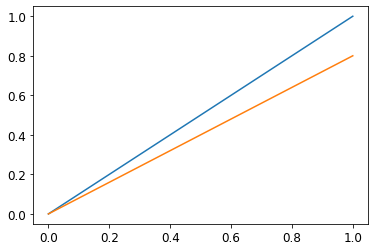

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [0,1]
fig, ax = plt.subplots()

ax.plot(x, [0,precision])
ax.plot(x, [0,recall] )
plt.show()

10. Viết hàm tính diện tích AUC của mô hình.

In [ ]:
metrics.auc(sensitivity, specificity)

0.92